Average RTT by region (ms):
Region
West         11.605415
Midwest      12.355254
Northeast    13.262429
South        14.736741
Mountain     37.577518
Name: RTT Avg (ms), dtype: float64

Average Packet Loss by region (%):
Region
Northeast    0.008658
West         0.008658
South        0.008666
Mountain     0.014430
Midwest      3.375000
Name: Packet Loss (%), dtype: float64

Top 5 servers by highest average RTT (ms):
Server
www.utah.edu        55.586065
www.unm.edu         44.888450
www.duke.edu        27.309378
www.uchicago.edu    21.576611
www.mit.edu         15.973823
Name: RTT Avg (ms), dtype: float64



<Figure size 1000x600 with 0 Axes>

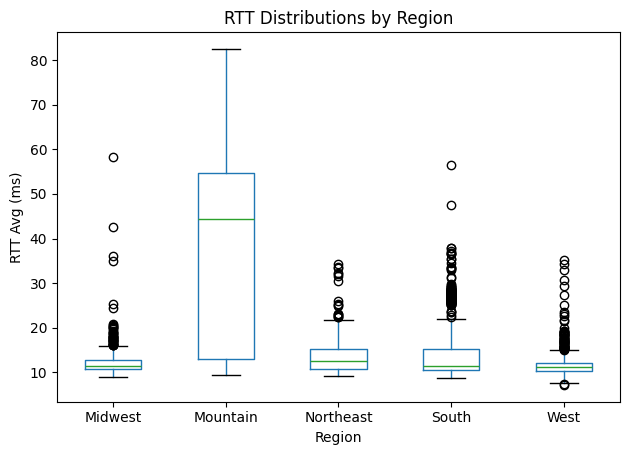

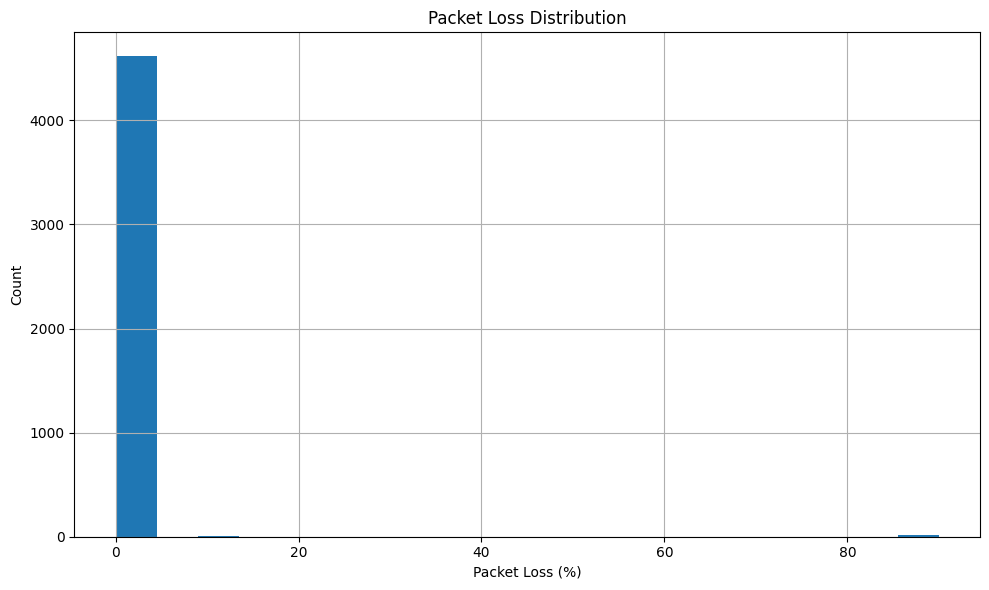

Average Hop Count by Region:
Region
Midwest      21.820833
West         23.200000
Northeast    25.000866
Mountain     27.666667
South        28.429809
Name: Hop Count, dtype: float64


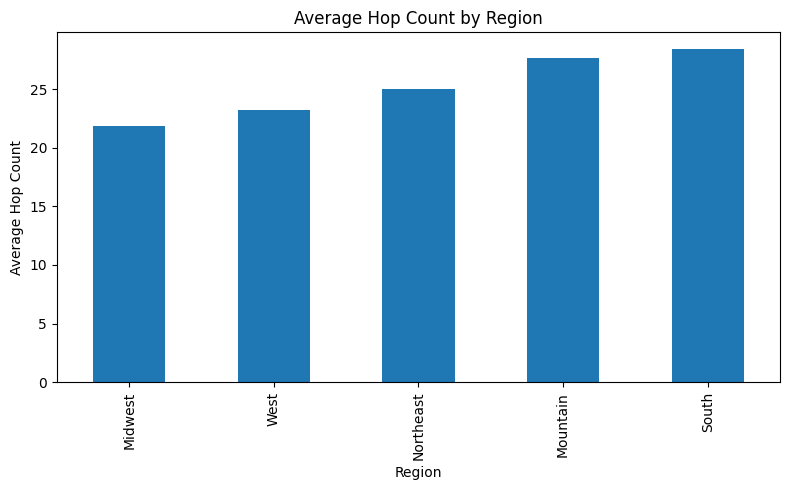

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('network_latency_data.csv')

# Ensure numeric columns are correctly typed
df['Packet Loss (%)'] = pd.to_numeric(df['Packet Loss (%)'], errors='coerce')
df['RTT Min (ms)'] = pd.to_numeric(df['RTT Min (ms)'], errors='coerce')
df['RTT Avg (ms)'] = pd.to_numeric(df['RTT Avg (ms)'], errors='coerce')
df['RTT Max (ms)'] = pd.to_numeric(df['RTT Max (ms)'], errors='coerce')
df['Hop Count'] = pd.to_numeric(df['Hop Count'], errors='coerce')

# Drop rows 
df = df.dropna(subset=['RTT Avg (ms)', 'Packet Loss (%)', 'Hop Count'])

# 1. Compute and display the average RTT by region
avg_rtt_by_region = df.groupby('Region')['RTT Avg (ms)'].mean().sort_values()
print("Average RTT by region (ms):")
print(avg_rtt_by_region)
print()

# 2. Compute and display the average packet loss by region
avg_loss_by_region = df.groupby('Region')['Packet Loss (%)'].mean().sort_values()
print("Average Packet Loss by region (%):")
print(avg_loss_by_region)
print()

# 3. Find the top 5 servers with the highest average RTT
top5_servers_by_rtt = df.groupby('Server')['RTT Avg (ms)'].mean().sort_values(ascending=False).head(5)
print("Top 5 servers by highest average RTT (ms):")
print(top5_servers_by_rtt)
print()

# 4. Distribution of RTT across regions
# Plot a boxplot of average RTT by region
plt.figure(figsize=(10,6))
df.boxplot(column='RTT Avg (ms)', by='Region', grid=False)
plt.title('RTT Distributions by Region')
plt.suptitle('')
plt.xlabel('Region')
plt.ylabel('RTT Avg (ms)')
plt.tight_layout()
plt.show()

# 5. Packet Loss distribution
# Plot histogram of packet loss
plt.figure(figsize=(10,6))
df['Packet Loss (%)'].hist(bins=20)
plt.title('Packet Loss Distribution')
plt.xlabel('Packet Loss (%)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# 6. Hop Count distribution across regions
avg_hop_by_region = df.groupby('Region')['Hop Count'].mean().sort_values()
print("Average Hop Count by Region:")
print(avg_hop_by_region)

# Plot bar chart of average hop count by region
avg_hop_by_region.plot(kind='bar', figsize=(8,5), title='Average Hop Count by Region')
plt.ylabel('Average Hop Count')
plt.tight_layout()
plt.show()


Average Packet Loss by region (%):
Region
Northeast    0.008658
West         0.008658
South        0.008666
Mountain     0.014430
Midwest      3.375000
Name: Packet Loss (%), dtype: float64



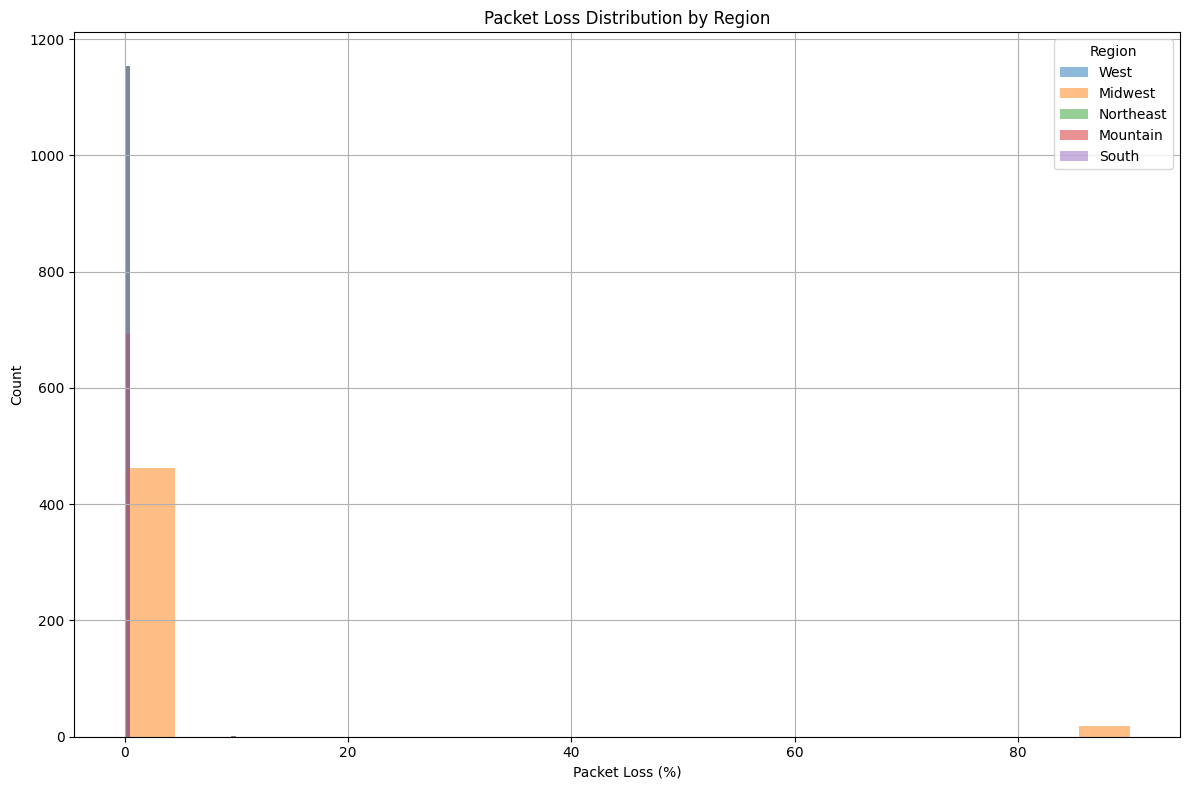

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('network_latency_data.csv')

# Ensure numeric columns are correctly typed
df['Packet Loss (%)'] = pd.to_numeric(df['Packet Loss (%)'], errors='coerce')
df['RTT Min (ms)'] = pd.to_numeric(df['RTT Min (ms)'], errors='coerce')
df['RTT Avg (ms)'] = pd.to_numeric(df['RTT Avg (ms)'], errors='coerce')
df['RTT Max (ms)'] = pd.to_numeric(df['RTT Max (ms)'], errors='coerce')
df['Hop Count'] = pd.to_numeric(df['Hop Count'], errors='coerce')

# Drop rows with missing or invalid data if necessary
df = df.dropna(subset=['RTT Avg (ms)', 'Packet Loss (%)', 'Hop Count', 'Region'])

# 1. Compute and display the average packet loss by region
avg_loss_by_region = df.groupby('Region')['Packet Loss (%)'].mean().sort_values()
print("Average Packet Loss by region (%):")
print(avg_loss_by_region)
print()

# 2. Visualize Packet Loss Distribution by Region
regions = df['Region'].unique()
plt.figure(figsize=(12, 8))

for region in regions:
    # Filter the data for each region
    region_data = df[df['Region'] == region]['Packet Loss (%)']
    
    # Plot histogram for the region
    plt.hist(region_data, bins=20, alpha=0.5, label=region)

# Add plot details
plt.title('Packet Loss Distribution by Region')
plt.xlabel('Packet Loss (%)')
plt.ylabel('Count')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()
plt.show()


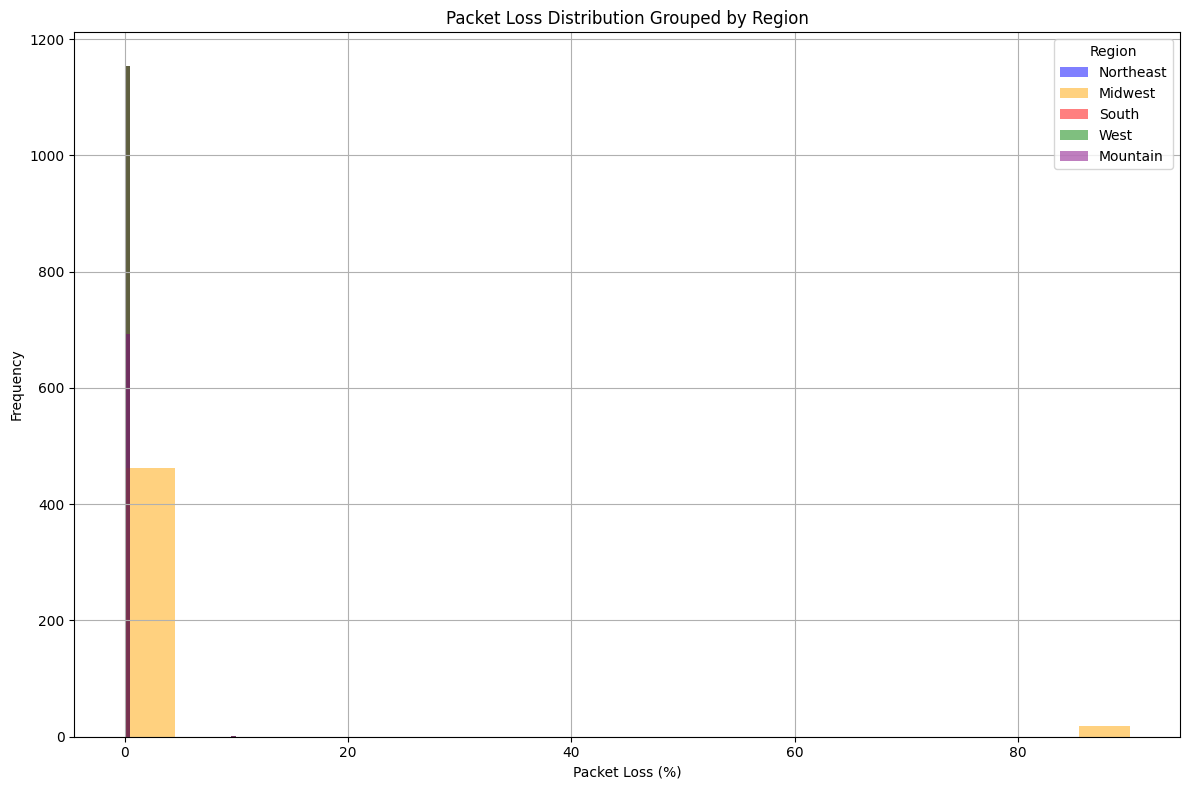

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('network_latency_data.csv')

# Ensure numeric columns are correctly typed
df['Packet Loss (%)'] = pd.to_numeric(df['Packet Loss (%)'], errors='coerce')

# Drop rows with missing or invalid data if necessary
df = df.dropna(subset=['Packet Loss (%)', 'Region'])

# Define color mapping for regions
region_colors = {
    'Northeast': 'blue',
    'Midwest': 'orange',
    'South': 'red',
    'West': 'green',
    'Mountain': 'purple'
}

# Initialize the plot
plt.figure(figsize=(12, 8))

# Loop through each region and plot its packet loss distribution
for region, color in region_colors.items():
    region_data = df[df['Region'] == region]['Packet Loss (%)']
    plt.hist(region_data, bins=20, alpha=0.5, label=region, color=color)

# Add plot details
plt.title('Packet Loss Distribution Grouped by Region')
plt.xlabel('Packet Loss (%)')
plt.ylabel('Frequency')
plt.legend(title='Region')
plt.grid(True)
plt.tight_layout()

plt.show()


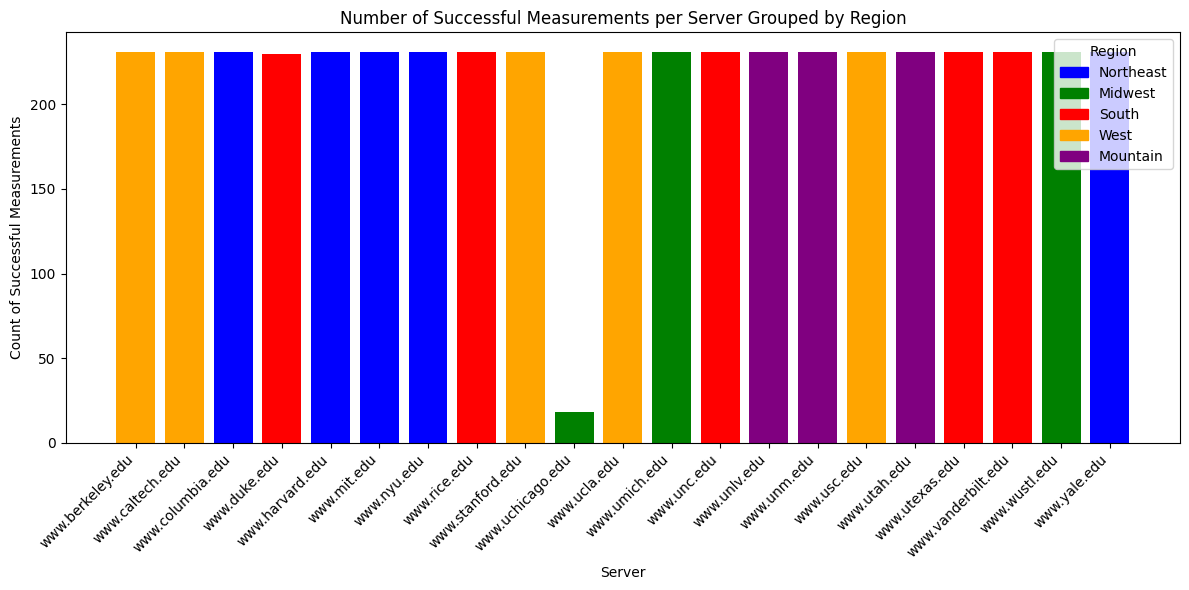

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

df = pd.read_csv('network_latency_data.csv')

# Filter out rows where ping measurements failed
df_clean = df.dropna(subset=['RTT Avg (ms)'])

# Count the number of successful measurements per server grouped by region
counts_by_server = df_clean.groupby(['Server', 'Region']).size().reset_index(name='Count')

# Define a color map for regions
region_colors = {
    'Northeast': 'blue',
    'Midwest': 'green',
    'South': 'red',
    'West': 'orange',
    'Mountain': 'purple'
}

# Add a color column to the counts DataFrame
counts_by_server['Color'] = counts_by_server['Region'].map(region_colors)

# Create a bar chart
plt.figure(figsize=(12, 6))

# Plot the data
plt.bar(
    counts_by_server['Server'],
    counts_by_server['Count'],
    color=counts_by_server['Color']
)

# Add title and labels
plt.title('Number of Successful Measurements per Server Grouped by Region')
plt.xlabel('Server')
plt.ylabel('Count of Successful Measurements')

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add a legend for the regions
legend_patches = [mpatches.Patch(color=color, label=region) for region, color in region_colors.items()]
plt.legend(handles=legend_patches, title='Region')

# Tight layout for better fit
plt.tight_layout()

plt.show()



C:\Users\Ryanl\AppData\Local\Temp\ipykernel_24520\2395893620.py:15: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_clean['Hour'] = df_clean['Timestamp'].dt.floor('H')  # Round to the nearest hour
C:\Users\Ryanl\AppData\Local\Temp\ipykernel_24520\2395893620.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Hour'] = df_clean['Timestamp'].dt.floor('H')  # Round to the nearest hour


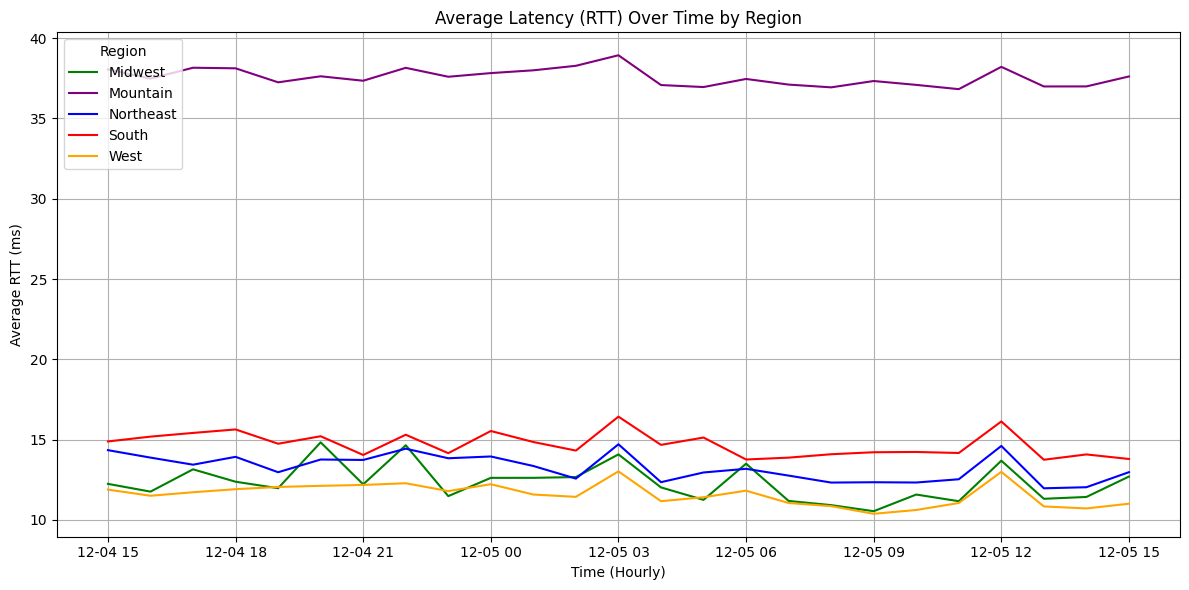

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('network_latency_data.csv')

# Ensure timestamp is in datetime format
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Filter out rows where ping failed
df_clean = df.dropna(subset=['RTT Avg (ms)'])

# Group data by region and time to calculate average RTT
# Let's bucket time into hourly averages for easier visualization
df_clean['Hour'] = df_clean['Timestamp'].dt.floor('H')  # Round to the nearest hour

# Group by hour and region to calculate the mean RTT for each region at each time
avg_rtt_time_region = df_clean.groupby(['Hour', 'Region'])['RTT Avg (ms)'].mean().reset_index()

# Pivot the data for easier plotting (time on x-axis, region as columns)
avg_rtt_pivot = avg_rtt_time_region.pivot(index='Hour', columns='Region', values='RTT Avg (ms)')

# Define a color map for the regions
region_colors = {
    'Northeast': 'blue',
    'Midwest': 'green',
    'South': 'red',
    'West': 'orange',
    'Mountain': 'purple'
}

# Plot the data
plt.figure(figsize=(12, 6))
for region in avg_rtt_pivot.columns:
    plt.plot(avg_rtt_pivot.index, avg_rtt_pivot[region], label=region, color=region_colors[region])

# Add chart details
plt.title('Average Latency (RTT) Over Time by Region')
plt.xlabel('Time (Hourly)')
plt.ylabel('Average RTT (ms)')
plt.legend(title='Region', loc='upper left')  # Add a legend with region names and colors
plt.grid(True)
plt.tight_layout()
plt.show()


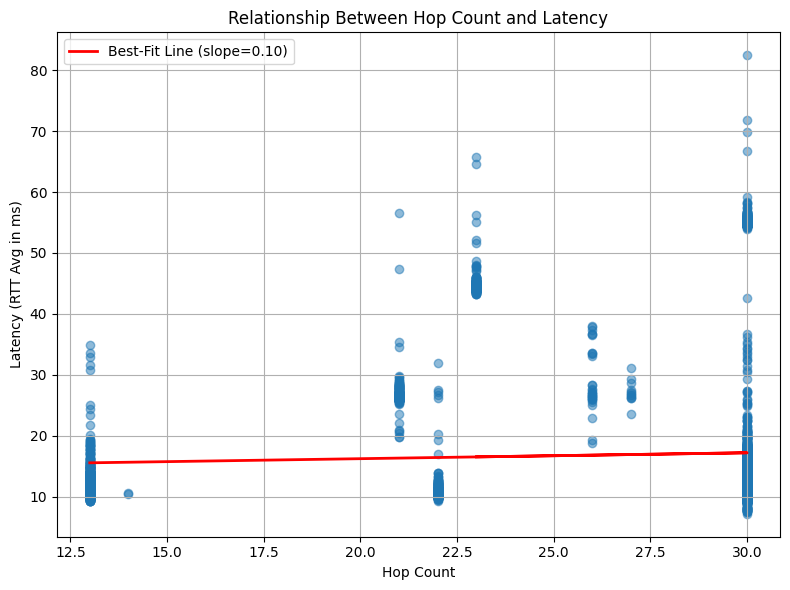

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example: Assume df is your DataFrame and contains 'Hop Count' and 'RTT Avg (ms)' columns
# Make sure these columns are numeric
df['Hop Count'] = pd.to_numeric(df['Hop Count'], errors='coerce')
df['RTT Avg (ms)'] = pd.to_numeric(df['RTT Avg (ms)'], errors='coerce')
df = df.dropna(subset=['Hop Count', 'RTT Avg (ms)'])

# Extract values
x = df['Hop Count'].values
y = df['RTT Avg (ms)'].values

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, alpha=0.5)  # alpha adds some transparency, helpful if points overlap

# Optionally, fit a linear regression line to help visualize the trend
# Compute the best-fit line using numpy.polyfit
slope, intercept = np.polyfit(x, y, 1)
y_fit = slope * x + intercept

plt.plot(x, y_fit, color='red', linewidth=2, label=f'Best-Fit Line (slope={slope:.2f})')

# Add labels and title
plt.xlabel('Hop Count')
plt.ylabel('Latency (RTT Avg in ms)')
plt.title('Relationship Between Hop Count and Latency')
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.show()


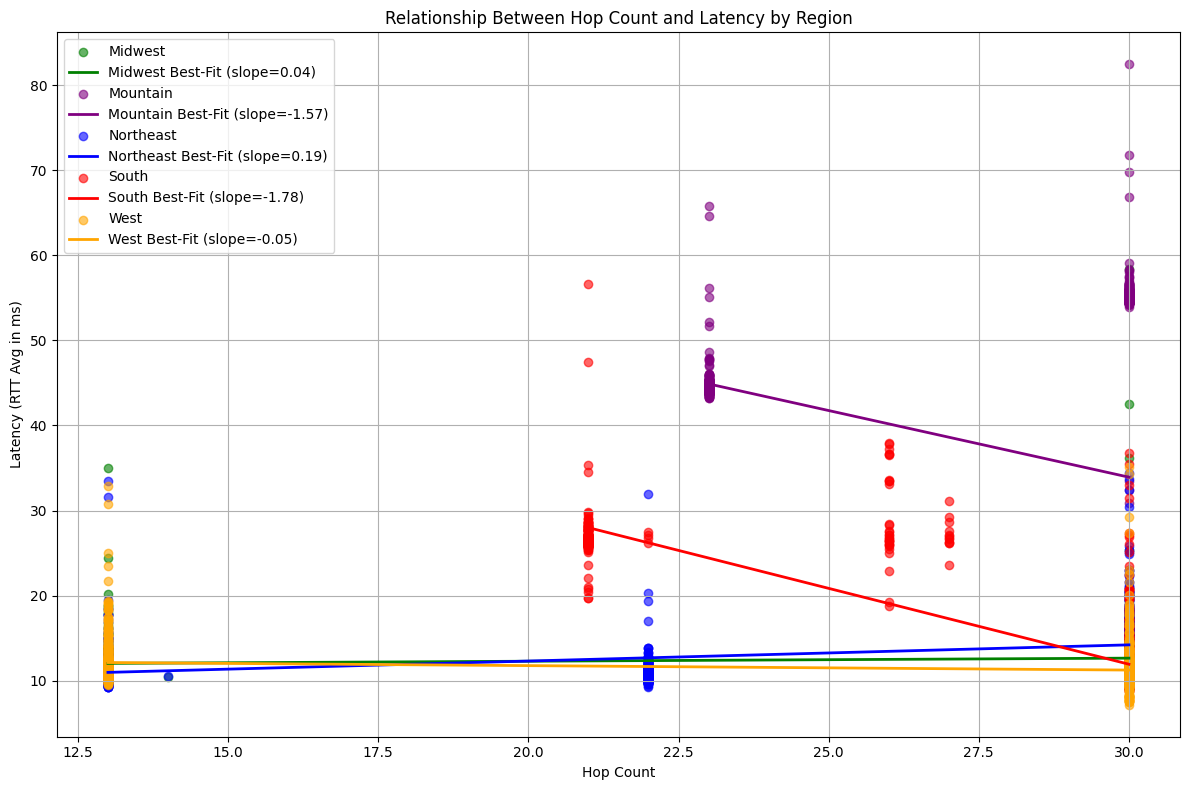

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Example: Assume df is your DataFrame
# Make sure 'Hop Count', 'RTT Avg (ms)', and 'Region' are valid columns
df['Hop Count'] = pd.to_numeric(df['Hop Count'], errors='coerce')
df['RTT Avg (ms)'] = pd.to_numeric(df['RTT Avg (ms)'], errors='coerce')
df = df.dropna(subset=['Hop Count', 'RTT Avg (ms)', 'Region'])

# Define colors for regions
region_colors = {
    'Northeast': 'blue',
    'Midwest': 'green',
    'South': 'red',
    'West': 'orange',
    'Mountain': 'purple'
}

# Create a scatter plot for each region
plt.figure(figsize=(12, 8))
for region, group in df.groupby('Region'):
    x = group['Hop Count']
    y = group['RTT Avg (ms)']
    
    # Scatter plot for the region
    plt.scatter(x, y, alpha=0.6, label=region, color=region_colors.get(region, 'gray'))
    
    # Add a best-fit line
    if len(group) > 1:  # Fit line only if we have enough data points
        slope, intercept = np.polyfit(x, y, 1)
        plt.plot(
            np.unique(x),
            slope * np.unique(x) + intercept,
            color=region_colors.get(region, 'gray'),
            linewidth=2,
            label=f'{region} Best-Fit (slope={slope:.2f})'
        )

# Add labels, title, and legend
plt.xlabel('Hop Count')
plt.ylabel('Latency (RTT Avg in ms)')
plt.title('Relationship Between Hop Count and Latency by Region')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
